## Observations and Insights

A few things stuck out to me upon completing the exercise and looking more closely at the results. 

   Firstly, mouse weight and average tumor size seemed to correlate fairly well when analyzing the scatter plot detailing this relationship for mice treated with the Capomulin drug regimen; with an r-square value of 0.70886, we see a fairly positive relationship between these two variables. Of course, these results only apply to mice treated with Capomulin, so it would be interesting to analyze this relationship may change for other treatment regimens. Another consideration would be to control for weight to analyze mice of the same size in order to determine how the tumor volume changes independent of how much an individual mouse weighs. 
   Another takeaway I had is that, according to my analysis, there were no outliers for the top four regimens' (top four regimens determined by greatest average reduction in tumor volume) tumor volume. This is something worth looking further into, as it wouldn't be surprising to encounter at least one outlier (perhaps in the form of a mouse that saw their tumor volume greatly increase or decrease due to reasons other than the drug treatment). Still, with no outliers skewing the data as it stands currently, we can be fairly confident that our data is good and insights can be extracted from it. 
   Lastly, I looked at the boxplots depicting the final tumor volumes for the top four treatment regimens. It is clear upon viewing the plot that Ramicane and Capomulin had smaller final tumor volumes than Propriva and Ceftamin. While one can ascertain from this information that Ramicane and Capomulin are more effective at treating cancer than Propriva and Ceftamin, this may not necessarily be the case. This plot only shows the size of the final tumors for mice treated with these regimens, and does not consider the volume of the tumor intially before treatment began. Perhaps a better method of determining the most effective treatment regimens would look at the reduction of tumor size rather than solely the final tumor size; for example, a drug that decreases a tumor's volume from 40 mm3 to 20 mm3 (50% reduction) is more effective than a drug that decreases a tumor's volume from 50 mm3 to 30 mm3 (40% reduction). It would be interesting to per
   

## Dependencies and starter code

In [255]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Grouping data by "Drug Regimen" column
grouped_regimens = combined_df.groupby(["Drug Regimen"])

#Getting tumor mean column
tumor_mean_df = grouped_regimens.mean()
tumor_mean = tumor_mean_df["Tumor Volume (mm3)"]
tumor_mean

#Getting tumor median column
tumor_med_df = grouped_regimens.median()
tumor_med = tumor_med_df["Tumor Volume (mm3)"]
tumor_med

#Getting tumor variance column
tumor_var_df = grouped_regimens.var()
tumor_var = tumor_var_df["Tumor Volume (mm3)"]
tumor_var

#Getting tumor st deviation column
tumor_std_df = grouped_regimens.std()
tumor_std = tumor_std_df["Tumor Volume (mm3)"]
tumor_std

#Getting tumor SEM column
tumor_sem_df = grouped_regimens.sem()
tumor_sem = tumor_sem_df["Tumor Volume (mm3)"]
tumor_sem

#Constructing DataFrame
frame = {'Mean': tumor_mean, 'Median': tumor_med,
         'Variance': tumor_var, 'Standard Deviation': tumor_std,
         'Standard Error': tumor_sem}

summary_stats_df = pd.DataFrame(frame)
summary_stats_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

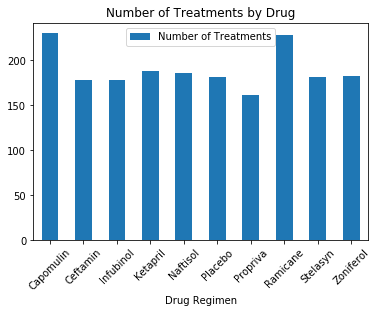

In [400]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_count = combined_df.groupby(["Drug Regimen"]).count()
regimen_count["Number of Treatments"] = regimen_count["Mouse ID"]

regimen_count.plot.bar(y=["Number of Treatments"], rot=45, title="Number of Treatments by Drug")



Text(0.5, 0, 'Drug Treatment Regimen')

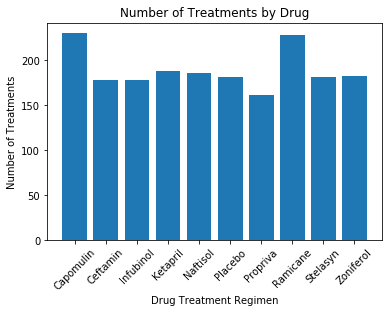

In [80]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x = list(regimen_count.index.values)
y = regimen_count["Number of Treatments"]
plt.bar(x,y)
plt.xticks(rotation=45)
plt.title("Number of Treatments by Drug")
plt.ylabel("Number of Treatments")
plt.xlabel("Drug Treatment Regimen")

## Pie plots

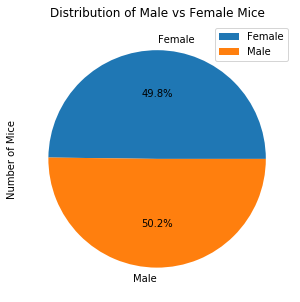

In [323]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#dropping duplicate mouse IDs to get df of unique mice
unique_mice = combined_df.drop_duplicates("Mouse ID")

#DF of counts for each column grouped by sex of mouse
sex_count_groups = unique_mice.groupby("Sex").count()
sex_count_groups["Number of Mice"] = sex_count_groups["Mouse ID"]

#preparing pie plot
mice_list = sex_count_groups["Number of Mice"]
labels = mice_list.index

sex_count_groups.plot.pie(y='Number of Mice', labels=labels,
                          autopct="%1.1f%%", figsize=(5,5),
                          title="Distribution of Male vs Female Mice")

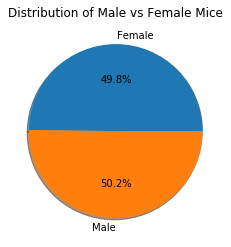

In [348]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Preparing plt pie plot
x = mice_list
labels = sex_count_groups.index

plt.title("Distribution of Male vs Female Mice")
plt.pie(x = x, labels=labels, autopct="%1.1f%%", radius=1.0, shadow=True)
plt.show()


## Quartiles, outliers and boxplots

In [461]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#combined_df.groupby["Mouse ID"]

# Creating DF to find final tumor volume for each mouse; used groupby and idxmax to see what tumor
# volume is at the highest(final) timepoint
tumor_vol_final = combined_df.loc[combined_df.groupby('Mouse ID')['Timepoint'].idxmax()]
tumor_vol_beginning = combined_df.loc[combined_df.groupby('Mouse ID')['Timepoint'].idxmin()]

# Finding the four most promising regimens
grouped_final_tumor = tumor_vol_final.groupby("Drug Regimen").mean()
sorted_final_tumor = grouped_final_tumor.sort_values(by=["Tumor Volume (mm3)"], ascending=True)
top_four = sorted_final_tumor.iloc[0:4]["Tumor Volume (mm3)"]

# Creating DFs for each of the top four regimens to find final tumor volume for each mouse 
ramicane_df = tumor_vol_final.loc[tumor_vol_final["Drug Regimen"] == "Ramicane"]
ramicane = ramicane_df["Tumor Volume (mm3)"]

capomulin_df = tumor_vol_final.loc[tumor_vol_final["Drug Regimen"] == "Capomulin"]
capomulin = capomulin_df["Tumor Volume (mm3)"]

propriva_df = tumor_vol_final.loc[tumor_vol_final["Drug Regimen"] == "Propriva"]
propriva = propriva_df["Tumor Volume (mm3)"]

ceftamin_df = tumor_vol_final.loc[tumor_vol_final["Drug Regimen"] == "Ceftamin"]
ceftamin = ceftamin_df["Tumor Volume (mm3)"]

# Gathering IQRs for each drug treatment regimen
ramicane_iqr = st.iqr(ramicane)
capomulin_iqr = st.iqr(capomulin)
propriva_iqr = st.iqr(propriva)
ceftamin_iqr = st.iqr(ceftamin)

print(f"The IQR for Ramicane is: {ramicane_iqr}")
print(f"The IQR for Capomulin is: {capomulin_iqr}")
print(f"The IQR for Propriva is: {propriva_iqr}")
print(f"The IQR for Ceftamin is: {ceftamin_iqr}")

# Checking for outliers; for each regimen get the 25% and 75% by 
# using the describe method and pulling values using iloc, then 
# creating upperbound and lowerbound for each regimen
ramicane_25 = ramicane.describe().iloc[4]
ramicane_75 = ramicane.describe().iloc[6]
ramicane_lb = ramicane_25 - (1.5 * ramicane_iqr)
ramicane_ub = ramicane_75 + (1.5 * ramicane_iqr)

capomulin_25 = capomulin.describe().iloc[4]
capomulin_75 = capomulin.describe().iloc[6]
capomulin_lb = capomulin_25 - (1.5 * capomulin_iqr)
capomulin_ub = capomulin_75 + (1.5 * capomulin_iqr)

propriva_25 = propriva.describe().iloc[4]
propriva_75 = propriva.describe().iloc[6]
propriva_lb = propriva_25 - (1.5 * propriva_iqr)
propriva_ub = propriva_75 + (1.5 * propriva_iqr)

ceftamin_25 = ceftamin.describe().iloc[4]
ceftamin_75 = ceftamin.describe().iloc[6]
ceftamin_lb = ceftamin_25 - (1.5 * ceftamin_iqr)
ceftamin_ub = ceftamin_75 + (1.5 * ceftamin_iqr)


# Checking for outliers for each regimen
ramicane_df.loc[ramicane_df["Tumor Volume (mm3)"] < ramicane_lb]
ramicane_df.loc[ramicane_df["Tumor Volume (mm3)"] > ramicane_ub]

capomulin_df.loc[capomulin_df["Tumor Volume (mm3)"] < capomulin_lb]
capomulin_df.loc[capomulin_df["Tumor Volume (mm3)"] > capomulin_ub]

propriva_df.loc[propriva_df["Tumor Volume (mm3)"] < propriva_lb]
propriva_df.loc[propriva_df["Tumor Volume (mm3)"] > propriva_ub]

ceftamin_df.loc[ceftamin_df["Tumor Volume (mm3)"] < ceftamin_lb]
ceftamin_df.loc[ceftamin_df["Tumor Volume (mm3)"] > ceftamin_ub]

# No outliers after running the above 8 lines individually; there must 
# be an faster/easier way to do this, but what I did does work

The IQR for Ramicane is: 9.098536719999998
The IQR for Capomulin is: 7.781863460000004
The IQR for Propriva is: 13.447910629999996
The IQR for Ceftamin is: 15.577752179999997


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


Text(0.5, 1.0, 'Final Mouse Tumor Volumes (mm3) for the Top Four Treatments')

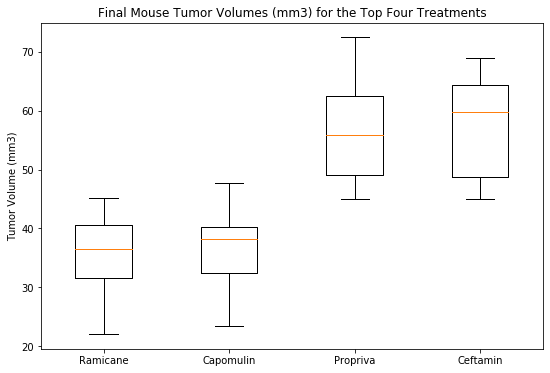

In [462]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Setting up boxplot data list
data_to_plot = [ramicane, capomulin, propriva, ceftamin]

# Creating figure
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot()

# Creating boxplot
bp = ax.boxplot(data_to_plot)
ax.set_xticklabels(["Ramicane", "Capomulin", "Propriva", "Ceftamin"])
plt.ylabel("Tumor Volume (mm3)")
plt.title("Final Mouse Tumor Volumes (mm3) for the Top Four Treatments")

## Line and scatter plots

Text(0.5, 1.0, 'Tumor Volume (mm3) over Time for Mouse u364')

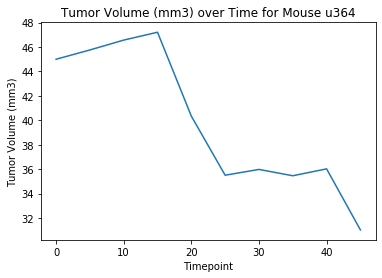

In [402]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Using .loc method to create DF of all mice who were treated with Capomulin
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]

# using .sample to find a random mouse id
mouse_id = capomulin_df["Mouse ID"].sample()

# creating DF of all treatments for the random mouse id that we stored in the "mouse_id" variable
capomulin_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == mouse_id.iloc[0]]

# creating variables to store x data and y data
x = capomulin_mouse["Timepoint"]
y = capomulin_mouse["Tumor Volume (mm3)"]

plt.plot(x, y)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume (mm3) over Time for Mouse {mouse_id.iloc[0]}")


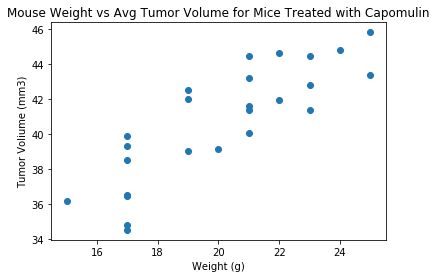

In [253]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_avg_tumor = capomulin_df.groupby("Mouse ID").mean()

# Setting up variables for scatter plot
x = mouse_avg_tumor["Weight (g)"]
y = mouse_avg_tumor["Tumor Volume (mm3)"]

# Creating scatter plot
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Voliume (mm3)")
plt.title("Mouse Weight vs Avg Tumor Volume for Mice Treated with Capomulin")
plt.show()

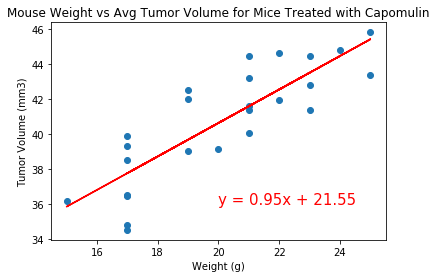

The correlation cooefficient is: 0.7088568047708715


In [410]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Calculating correlation coefficient 
r = np.corrcoef(x, y)
r_value = r[0,1]
r_square = r_value*r_value

# Setting up scatter/linear regression plot
x = mouse_avg_tumor["Weight (g)"]
y = mouse_avg_tumor["Tumor Volume (mm3)"]

# Defining linear regression line equation
slope, intercept, rvalue, pvalue, stderr = st.linregress(x,y)
regression_value = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creating scatter plot
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Avg Tumor Volume for Mice Treated with Capomulin")

# Adding linear regression line
plt.plot(x, regression_value,"r-")
plt.annotate(line_eq, (20,36), fontsize=15, color="r")

plt.show()

# Printing r-square value
print(f"The correlation cooefficient is: {r_square}")

